# Tarea 4 - Introducción a la Biomecánica
### Pregunta 1

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from scipy import integrate
from decimal import Decimal

In [33]:
# Paths
harmonic_path = join('data', 'harmonic.csv')
quasistatic_path = join('data', 'quasistatic.csv')

# Data windows
cycle_h = {
    'start': 3935,
    'end': 4136,
    'first_end': 3956
}
cycle_q = {
    'start': 3620,
    'end': 6700,
}

# Color
naranjo = '#F59A23'

In [34]:
# Import data
harmonic = pd.read_csv(harmonic_path, skiprows=[0, 1, 2, 4])
quasistatic = pd.read_csv(quasistatic_path, skiprows=[0, 1, 2, 4])
quasistatic.head()

Elapsed Time   Disp    Load 3 
0           0.00   1.064    -7.61
1           0.01   1.065    -7.53
2           0.02   1.069    -7.50
3           0.03   1.074    -7.26
4           0.04   1.079    -6.67

In [35]:
# Remove spaces from column names
quasistatic.rename(columns=lambda x: x.strip(), inplace=True)
harmonic.rename(columns=lambda x: x.strip(), inplace=True)

In [36]:
# Check data
quasistatic.loc[:, 'Elapsed Time']

0        0.00
1        0.01
2        0.02
3        0.03
4        0.04
        ...  
8536    85.36
8537    85.37
8538    85.38
8539    85.39
8540    85.40
Name: Elapsed Time, Length: 8541, dtype: float64

In [37]:
# Data columns
time_q = quasistatic.loc[:, 'Elapsed Time']
disp_q = quasistatic.loc[:, 'Disp']
load_q = quasistatic.loc[:, 'Load 3']

time_h = harmonic.loc[:, 'Elapsed Time']
disp_h = harmonic.loc[:, 'Disp']
load_h = harmonic.loc[:, 'Load 3']

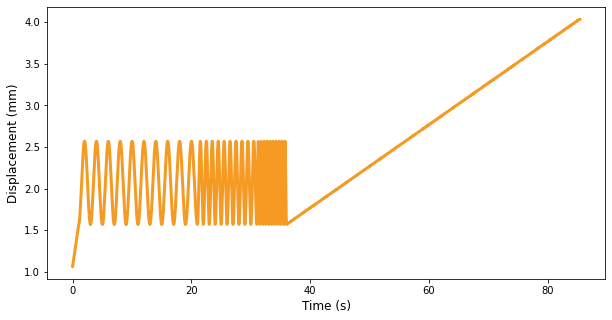

In [38]:
# Plot quasistatic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    time_q,
    disp_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
# plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

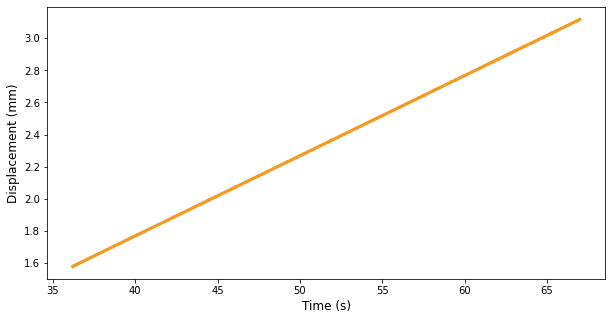

In [39]:
# Plot quasistatic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    time_q[cycle_q['start']:cycle_q['end']],
    disp_q[cycle_q['start']:cycle_q['end']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
# plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

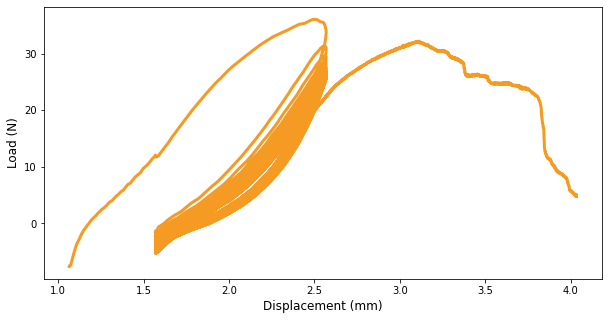

In [40]:
# Plot quasistatic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_q,
    load_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement (mm)', fontsize=12)
plt.ylabel('Load (N)', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

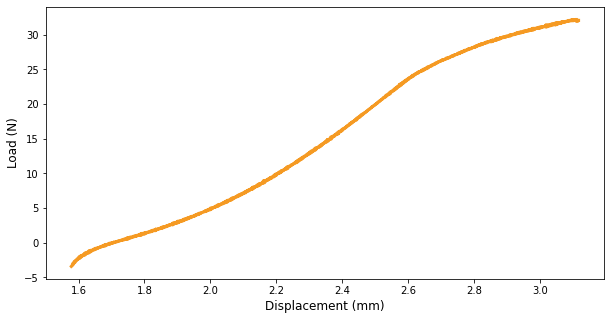

In [41]:
# Plot quasistatic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_q[cycle_q['start']:cycle_q['end']],
    load_q[cycle_q['start']:cycle_q['end']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement (mm)', fontsize=12)
plt.ylabel('Load (N)', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

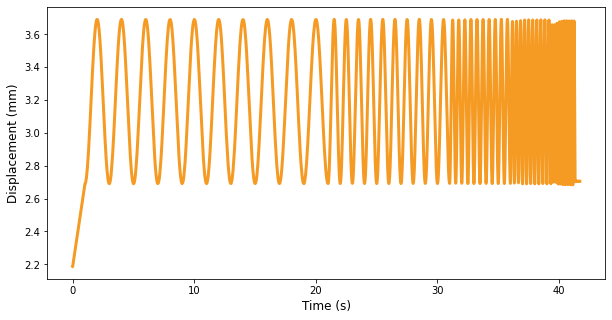

In [42]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    time_h,
    disp_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
# plt.title('Harmonic (Displacement vs. Time)', fontsize=14)
plt.show()

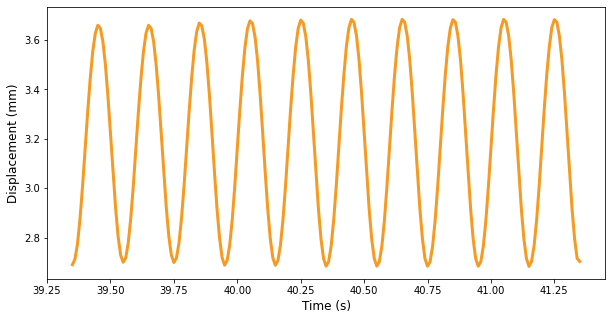

In [43]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    time_h[cycle_h['start']:cycle_h['end']],
    disp_h[cycle_h['start']:cycle_h['end']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Displacement (mm)', fontsize=12)
# plt.title('Harmonic (Displacement vs. Time)', fontsize=14)
plt.show()

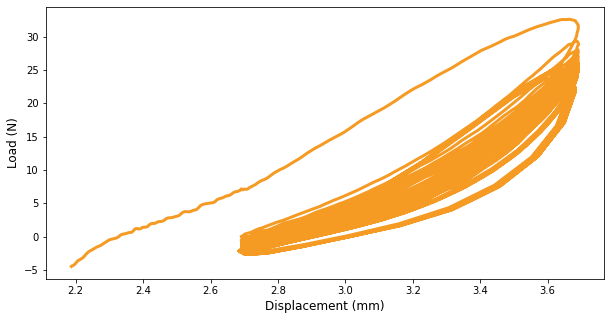

In [44]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_h,
    load_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement (mm)', fontsize=12)
plt.ylabel('Load (N)', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

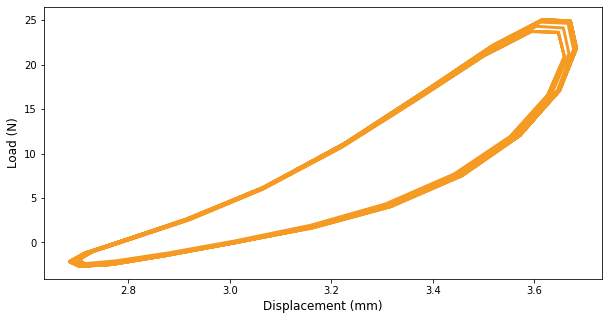

In [45]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_h[cycle_h['start']:cycle_h['end']],
    load_h[cycle_h['start']:cycle_h['end']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement (mm)', fontsize=12)
plt.ylabel('Load (N)', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

### Pregunta 2

### Pregunta 3

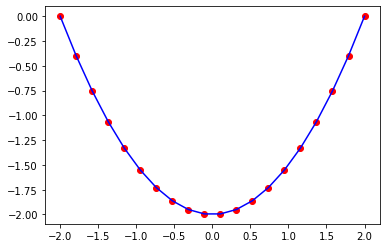

In [46]:
x = np.linspace(-2, 2, num=20)
y = x
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
plt.show()

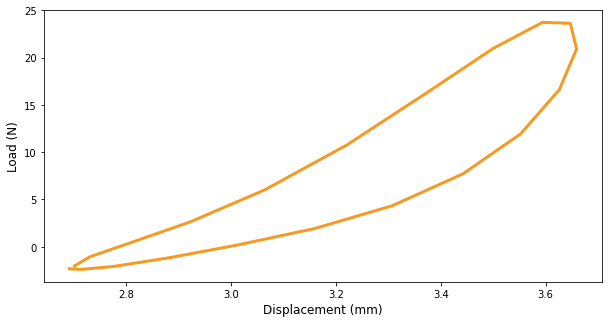

In [47]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_h[cycle_h['start']:cycle_h['first_end']],
    load_h[cycle_h['start']:cycle_h['first_end']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement (mm)', fontsize=12)
plt.ylabel('Load (N)', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

In [48]:
# Integrate using Simpson's rule
# https://en.wikipedia.org/wiki/Simpson%27s_rule
# https://stackoverflow.com/questions/17602076/how-do-i-integrate-two-1-d-data-arrays-in-python

e_loss = integrate.simps(
      load_h[cycle_h['start']:cycle_h['first_end']],
      disp_h[cycle_h['start']:cycle_h['first_end']],
      axis=-1,
      even='avg'
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss / 1000), 'J')

Energía disipada: -6.5074E-03 J


#### Hecho con :heart: por Iván Vergara Lam